In [2]:
import mysql.connector
from mysql.connector import Error
import pandas as pd


def create_database(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Database created successfully")
    except Error as err:
        print(f"Error: '{err}'")

def create_server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

In [25]:
pw = 'xxx'
connection = create_server_connection("localhost", "root",'xxx')
create_database_query = 'CREATE DATABASE Coordinates'
#create_database(connection, create_database_query)

#ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY 'xxx';

MySQL Database connection successful


In [15]:

create_video_frame_table = """
CREATE TABLE Coordinate (
  road VARCHAR(40) NOT NULL,
  direction VARCHAR(1) NOT NULL,
  meter INT,
  latitude FLOAT,
  longitude FLOAT
  );
 """

connection = create_db_connection("localhost", "root", pw, 'Coordinates') # Connect to the Database
execute_query(connection, create_video_frame_table) # Execute our defined query

MySQL Database connection successful
Query successful


In [23]:
pop_teacher = """
INSERT INTO Coordinate VALUES
('MS-112', 'C', 10, -20.641082, -51.76858);
"""

connection = create_db_connection("localhost", "root", pw, 'Coordinates')
execute_query(connection, pop_teacher)

MySQL Database connection successful
Query successful


In [39]:
def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

In [35]:
import time

In [42]:
q1 = """
SELECT *
FROM Coordinate;
"""
q1="""
SELECT *
FROM Coordinate
WHERE road= 'MS-112' and meter=300;"""
q1 = """SELECT * FROM Coordinate WHERE road= 'MS-112' and direction='C' and latitude<-20.63233 and latitude>-20.652330000000003 and longitude<-51.76315 and longitude>-51.78315;
"""

start = time.time()
results = read_query(connection, q1)        
end = time.time()
print(end - start)
#connection = create_db_connection("localhost", "root", 'xxx', 'Coordinates')


#print(results)

0.013112545013427734


In [18]:
results

32

In [ ]:
update = """
UPDATE client 
SET address = '23 Fingiertweg, 14534 Berlin' 
WHERE client_id = 101;
"""

connection = create_db_connection("localhost", "root", pw, db)
execute_query(connection, update)

In [ ]:
delete_course = """
DELETE FROM course 
WHERE course_id = 20;
"""

connection = create_db_connection("localhost", "root", pw, db)
execute_query(connection, delete_course)

In [ ]:
def execute_list_query(connection, sql, val):
    cursor = connection.cursor()
    try:
        cursor.executemany(sql, val)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")


sql = '''
    INSERT INTO teacher (teacher_id, first_name, last_name, language_1, language_2, dob, tax_id, phone_no) 
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
    '''
    
val = [
    (7, 'Hank', 'Dodson', 'ENG', None, '1991-12-23', 11111, '+491772345678'), 
    (8, 'Sue', 'Perkins', 'MAN', 'ENG', '1976-02-02', 22222, '+491443456432')
]

connection = create_db_connection("localhost", "root", pw, db)
execute_list_query(connection, sql, val)

<class 'numpy.ndarray'>


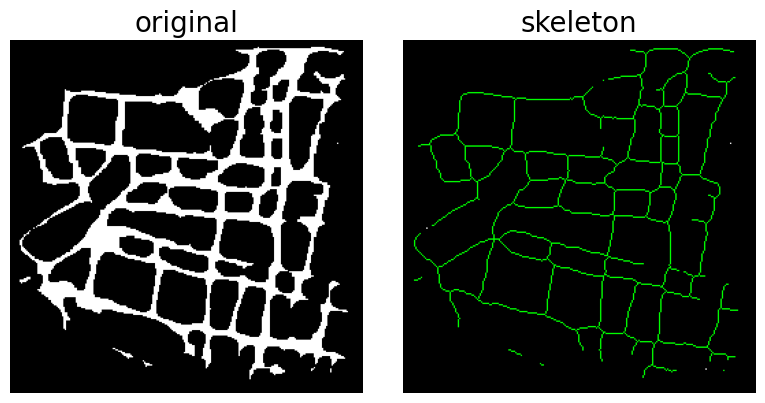

In [42]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
import cv2
# Invert the horse image
image = invert(data.horse())
print(type(data.horse()))
image = cv2.imread('/home/edu0101/Desktop/Egetra-Annotation-App/erosion.png')

# perform skeletonization
skeleton = skeletonize(image)


# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

In [38]:

# Python program to demonstrate erosion and
# dilation of images.
import cv2
import numpy as np
 
# Reading the input image
img = cv2.imread('/home/edu0101/Desktop/image.png', 0)
 
# Taking a matrix of size 5 as the kernel
kernel = np.ones((5, 5), np.uint8)
 
# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)
 
#cv2.imshow('Input', img)
#cv2.imshow('Erosion', img_erosion)
#cv2.imshow('Dilation', img_dilation)
 
#cv2.waitKey(0)

In [40]:
from PIL import Image
x = Image.fromarray(img_erosion)
x.show()
x.save('erosion.png')

In [ ]:
if __name__ == "__main__":
    parser = argparse.ArgumentParser(description='Code for Eroding and Dilating tutorial.')
    parser.add_argument('--input', help='Path to input image.', default='LinuxLogo.jpg')
    args = parser.parse_args()
    main(args.input)
